In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.preprocessing import MinMaxScaler
import math

import warnings 
warnings.filterwarnings('ignore')

np.random.seed(7)

In [2]:
df = pd.read_csv("/content/Chatt-Al-Jarid.txt", sep = '\t')

In [3]:
df.head()

,TimeStamp,"MeanWindSpeedUID_10,0m|Mean wind speed|L-1,00|U75,00","DirectionUID_10,0m|Wind direction|L0,00|U360,00","Comment_10,0m","TimeStampStatus_10,0m","SampleStatus_10,0m","DataStatus_MeanWindSpeedUID_10,0m","DataStatus_DirectionUID_10,0m","MeanWindSpeedUID_100,0m|Mean wind speed|L-1,00|U75,00","DirectionUID_100,0m|Wind direction|L0,00|U360,00",...,"StabilityUID_2,0m|Stability (1/L)","RelativeHumidityUID_2,0m|Relative humidity|L0,00|U100,00","Comment_2,0m","TimeStampStatus_2,0m","SampleStatus_2,0m","DataStatus_TemperatureUID_2,0m","DataStatus_SolarRadiationUID_2,0m","DataStatus_StabilityUID_2,0m","DataStatus_RelativeHumidityUID_2,0m",Unnamed: 26
0,NaN,[m/s],[Degrees],NaN,NaN,NaN,NaN,NaN,[m/s],[Degrees],...,[1/m],[%],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01/01/1992 01:00,"2,11","290,9",NaN,0.0,0.0,0.0,0.0,"3,79","324,1",...,"0,190390","84,3",NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,01/01/1992 02:00,"1,72","281,2",NaN,0.0,0.0,0.0,0.0,"3,62","321,1",...,"0,232599","84,1",NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,01/01/1992 03:00,"1,71","276,7",NaN,0.0,0.0,0.0,0.0,"3,92","311,5",...,"0,512680","85,5",NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,01/01/1992 04:00,"1,77","276,1",NaN,0.0,0.0,0.0,0.0,"4,27","307,2",...,"0,536433","88,1",NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [4]:
def clean_data(df):
  df.drop(0, inplace=True)
  df.drop(["Comment_10,0m", "Comment_100,0m", "Comment_2,0m", "Unnamed: 26"],
          axis = 1, inplace = True)
  df["TimeStamp"] = pd.to_datetime(df["TimeStamp"])
  df.set_index("TimeStamp", inplace=True)
  f = lambda x: float(np.NaN) if (x=="-") else float(x.replace(',','.'))
  f = np.vectorize(f)
  for i in df.columns:
    if (i!="TimeStamp"):
      if (df[i].dtype == "object"):
        df[i] = f(df[i])
      elif (df[i].std()==0):
        df.drop(i, axis = 1, inplace = True)
  return df

In [5]:
df = clean_data(df)

In [6]:
df.head()

,"MeanWindSpeedUID_10,0m|Mean wind speed|L-1,00|U75,00","DirectionUID_10,0m|Wind direction|L0,00|U360,00","MeanWindSpeedUID_100,0m|Mean wind speed|L-1,00|U75,00","DirectionUID_100,0m|Wind direction|L0,00|U360,00","TemperatureUID_2,0m|Temperature|L-50,00|U60,00","SolarRadiationUID_2,0m|Solar irradiation|L-10,00|U2000,00","StabilityUID_2,0m|Stability (1/L)","RelativeHumidityUID_2,0m|Relative humidity|L0,00|U100,00","DataStatus_StabilityUID_2,0m"
TimeStamp,,,,,,,,,
1992-01-01 01:00:00,2.11,290.9,3.79,324.1,4.6,0.0,0.190390,84.3,0.0
1992-01-01 02:00:00,1.72,281.2,3.62,321.1,4.7,0.0,0.232599,84.1,0.0
1992-01-01 03:00:00,1.71,276.7,3.92,311.5,4.6,0.0,0.512680,85.5,0.0
1992-01-01 04:00:00,1.77,276.1,4.27,307.2,4.3,0.0,0.536433,88.1,0.0
1992-01-01 05:00:00,1.75,279.6,4.47,310.3,4.1,0.0,0.350248,88.4,0.0


In [7]:
df.shape

(262992, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 262992 entries, 1992-01-01 01:00:00 to 2022-01-01 00:00:00
Data columns (total 9 columns):
 #   Column                                                     Non-Null Count   Dtype  
---  ------                                                     --------------   -----  
 0   MeanWindSpeedUID_10,0m|Mean wind speed|L-1,00|U75,00       262992 non-null  float64
 1   DirectionUID_10,0m|Wind direction|L0,00|U360,00            262992 non-null  float64
 2   MeanWindSpeedUID_100,0m|Mean wind speed|L-1,00|U75,00      262992 non-null  float64
 3   DirectionUID_100,0m|Wind direction|L0,00|U360,00           262992 non-null  float64
 4   TemperatureUID_2,0m|Temperature|L-50,00|U60,00             262992 non-null  float64
 5   SolarRadiationUID_2,0m|Solar irradiation|L-10,00|U2000,00  262992 non-null  float64
 6   StabilityUID_2,0m|Stability (1/L)                          262984 non-null  float64
 7   RelativeHumidityUID_2,0m|Relative humidity|L0,00|U

In [9]:
df.describe()

,"MeanWindSpeedUID_10,0m|Mean wind speed|L-1,00|U75,00","DirectionUID_10,0m|Wind direction|L0,00|U360,00","MeanWindSpeedUID_100,0m|Mean wind speed|L-1,00|U75,00","DirectionUID_100,0m|Wind direction|L0,00|U360,00","TemperatureUID_2,0m|Temperature|L-50,00|U60,00","SolarRadiationUID_2,0m|Solar irradiation|L-10,00|U2000,00","StabilityUID_2,0m|Stability (1/L)","RelativeHumidityUID_2,0m|Relative humidity|L0,00|U100,00","DataStatus_StabilityUID_2,0m"
count,262992.000000,262992.000000,262992.000000,262992.000000,262992.000000,262992.000000,262984.000000,262992.000000,262992.000000
mean,2.946974,181.425148,4.878747,182.786023,20.454083,213.372934,-11.667888,61.123756,0.000973
std,1.539129,110.790483,2.385734,112.384618,7.789131,290.923638,2126.417138,20.362745,0.176489
min,0.000000,0.000000,0.010000,0.000000,0.400000,0.000000,-747433.875000,5.700000,0.000000
25%,1.800000,83.000000,3.080000,81.200000,14.300000,0.000000,-0.056436,44.700000,0.000000
50%,2.640000,179.700000,4.770000,182.200000,20.100000,10.580000,0.011801,61.500000,0.000000
75%,3.870000,287.700000,6.440000,293.600000,25.900000,408.920000,0.116250,78.300000,0.000000
max,13.030000,359.900000,20.200000,359.900000,46.900000,998.630000,112017.484375,100.000000,32.000000


In [10]:
Solar = df[['SolarRadiationUID_2,0m|Solar irradiation|L-10,00|U2000,00',
                ]].resample('1W').max().reset_index(drop=False) 

In [11]:
rs1 = MinMaxScaler()

Solar_scaled = rs1.fit_transform(Solar[['SolarRadiationUID_2,0m|Solar irradiation|L-10,00|U2000,00']])

In [12]:
train_size = int(0.85 * len(Solar_scaled))
test_size = len(Solar_scaled) - train_size

In [13]:
n_lookback = 104  # length of input sequences (lookback period)
n_forecast = 104  # length of output sequences (forecast period)

X = []
Y = []

y = Solar_scaled.copy()

for i in range(n_lookback, len(y) - n_forecast + 1):
    X.append(y[i - n_lookback: i])
    Y.append(y[i: i + n_forecast])

X = np.array(X)
Y = np.array(Y)

x_train, x_test = X[:train_size], X[train_size:]
y_train, y_test = Y[:train_size], Y[train_size:]

In [14]:
x_train.shape

(1331, 104, 1)

In [15]:
x_test.shape

(28, 104, 1)

In [16]:
y_train.shape

(1331, 104, 1)

In [17]:
y_test.shape

(28, 104, 1)

In [18]:
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense, LSTM, Dropout, BatchNormalization

In [19]:

model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(n_lookback, 1)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(LSTM(units=256, return_sequences=True))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(LSTM(units=128))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(n_forecast))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X, Y, epochs=20, batch_size=32, validation_data=(x_test, y_test), verbose=1)

Epoch 1/20
43/43 [==============================] - 12s 47ms/step - loss: 1.1571 - val_loss: 0.4859
Epoch 2/20
43/43 [==============================] - 1s 22ms/step - loss: 0.7346 - val_loss: 0.2667
Epoch 3/20
43/43 [==============================] - 1s 22ms/step - loss: 0.4300 - val_loss: 0.1044
Epoch 4/20
43/43 [==============================] - 1s 22ms/step - loss: 0.2668 - val_loss: 0.0592
Epoch 5/20
43/43 [==============================] - 1s 22ms/step - loss: 0.2043 - val_loss: 0.0544
Epoch 6/20
43/43 [==============================] - 1s 22ms/step - loss: 0.1623 - val_loss: 0.0508
Epoch 7/20
43/43 [==============================] - 1s 22ms/step - loss: 0.1335 - val_loss: 0.0554
Epoch 8/20
43/43 [==============================] - 1s 22ms/step - loss: 0.1110 - val_loss: 0.0529
Epoch 9/20
43/43 [==============================] - 1s 22ms/step - loss: 0.0960 - val_loss: 0.0466
Epoch 10/20
43/43 [==============================] - 1s 22ms/step - loss: 0.0844 - val_loss: 0.0472
Epoch 11

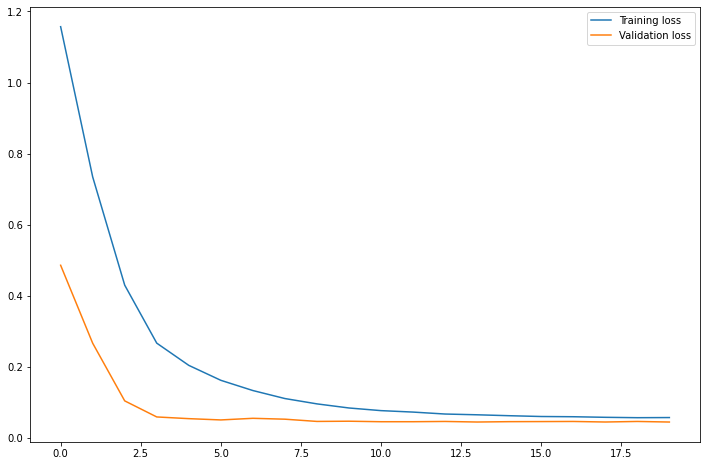

In [20]:
plt.figure(figsize = (12,8))
plt.plot(history.history['loss'], label = "Training loss")
plt.plot(history.history['val_loss'], label = "Validation loss")
plt.legend()

In [21]:
all = []

In [22]:
# generate the forecasts
X_ = y[- n_lookback:]  # last available input sequence
X_ = X_.reshape(1, n_lookback, 1)

Y_ = model.predict(X_).reshape(-1, 1)
firstyear = rs1.inverse_transform(Y_).copy()

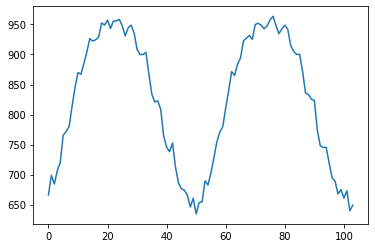

In [23]:
plt.plot(firstyear)

In [24]:
all.extend(list(firstyear.reshape((-1))))

In [25]:
X_ = Y_[- n_lookback:]  # last available input sequence
X_ = X_.reshape(1, n_lookback, 1)

Y_ = model.predict(X_).reshape(-1, 1)
secondyear = rs1.inverse_transform(Y_).copy()

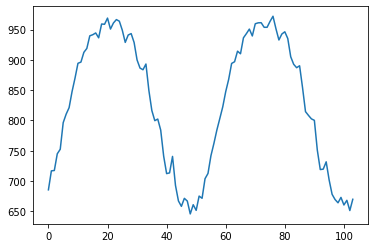

In [26]:
plt.plot(secondyear)

In [27]:
all.extend(list(secondyear.reshape((-1))))

In [28]:
X_ = Y_[- n_lookback:]  # last available input sequence
X_ = X_.reshape(1, n_lookback, 1)

Y_ = model.predict(X_).reshape(-1, 1)
thirdyear = rs1.inverse_transform(Y_).copy()

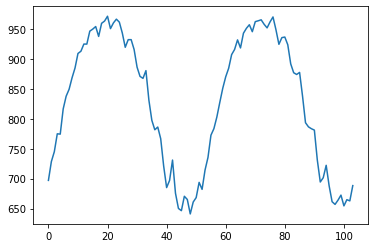

In [29]:
plt.plot(thirdyear)

In [30]:
all.extend(list(thirdyear.reshape((-1))))

In [31]:
X_ = Y_[- n_lookback:]  # last available input sequence
X_ = X_.reshape(1, n_lookback, 1)

Y_ = model.predict(X_).reshape(-1, 1)
fourthyear = rs1.inverse_transform(Y_).copy()

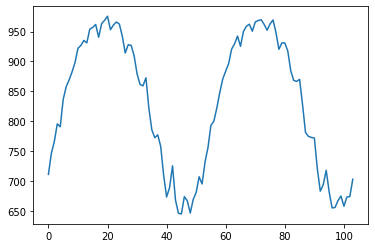

In [32]:
plt.plot(fourthyear)

In [33]:
all.extend(list(fourthyear.reshape((-1))))

In [34]:
X_ = Y_[- n_lookback:]  # last available input sequence
X_ = X_.reshape(1, n_lookback, 1)

Y_ = model.predict(X_).reshape(-1, 1)
fifthyear = rs1.inverse_transform(Y_).copy()

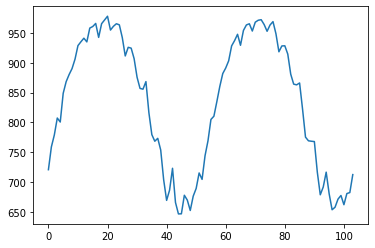

In [35]:
plt.plot(fifthyear)

In [36]:
all.extend(list(fifthyear.reshape((-1))))

In [37]:
X_ = Y_[- n_lookback:]  # last available input sequence
X_ = X_.reshape(1, n_lookback, 1)

Y_ = model.predict(X_).reshape(-1, 1)
sixthyear = rs1.inverse_transform(Y_).copy()

In [38]:
all.extend(list(sixthyear.reshape((-1))))

In [39]:
X_ = Y_[- n_lookback:]  # last available input sequence
X_ = X_.reshape(1, n_lookback, 1)

Y_ = model.predict(X_).reshape(-1, 1)
seventhyear = rs1.inverse_transform(Y_).copy()

In [40]:
all.extend(list(seventhyear.reshape((-1))))

In [41]:
X_ = Y_[- n_lookback:]  # last available input sequence
X_ = X_.reshape(1, n_lookback, 1)

Y_ = model.predict(X_).reshape(-1, 1)
eighthyear = rs1.inverse_transform(Y_).copy()

In [42]:
all.extend(list(eighthyear.reshape((-1))))

In [43]:
X_ = Y_[- n_lookback:]  # last available input sequence
X_ = X_.reshape(1, n_lookback, 1)

Y_ = model.predict(X_).reshape(-1, 1)
ninethyear = rs1.inverse_transform(Y_).copy()

In [44]:
all.extend(list(ninethyear.reshape((-1))))

In [45]:
X_ = Y_[- n_lookback:]  # last available input sequence
X_ = X_.reshape(1, n_lookback, 1)

Y_ = model.predict(X_).reshape(-1, 1)
tenthyear = rs1.inverse_transform(Y_).copy()

In [46]:
all.extend(list(tenthyear.reshape((-1))))

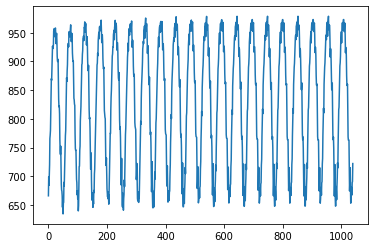

In [47]:
plt.plot(all)

In [48]:
import pickle

In [49]:
with open("SolarForecasted.pickle", "wb") as f:
  pickle.dump(all, f)